# Pratybos

<code>**1-2 : Perceptronas (numpy)**</code><br>
<code>**3-4 : Neuroninis tinklas (PyTorch)**</code><br>

### Perceptronas (numpy)

Šiame uždavinyje reikės sukurti perceptroną kuris gebėtų optimizuoti modelio parametrus taip kad išspręstu XOR problemą.
Sukurkite generinę klasę <code>**class NN**</code> kurią vėliau taip pat  panaudosite uždavinyje `#2`. Žemiau grafiko illiustracijos rasite šios klasės struktūra kurioje yra šie metodai:

- forward (skaičiavimas pirmyn)
- backward (skaičiavimas argal)
- fit (mokymasis)
- accuracy (tikslumo matavimas)
- plot (grafikus kuriantis metodas)

## #1

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
X = np.array([
    [0, 0], 
    [0, 1], 
    [1, 0], 
    [1, 1]
])
y = np.array([
    [0],   
    [1],   
    [1],   
    [0]
])

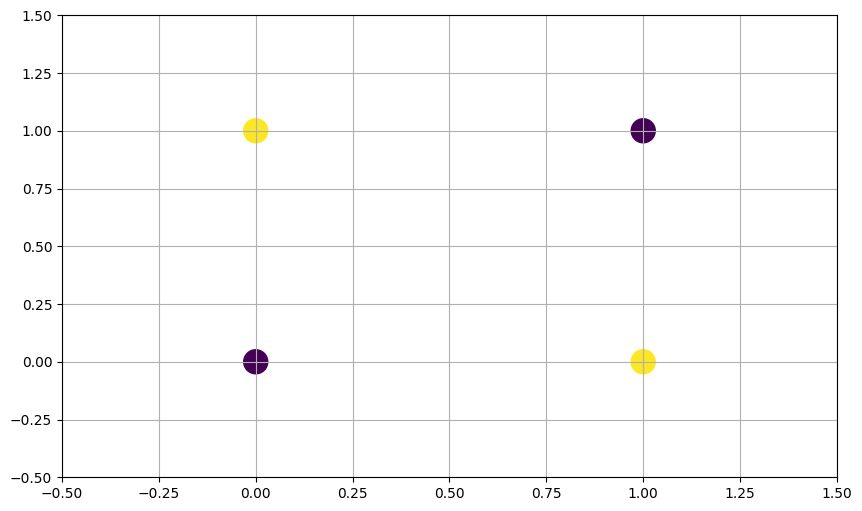

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, s=300)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)

In [106]:
#TODO: Jūsų programa prasideda nuo čia

class NN():
    def __init__(self, architecture:tuple):
        _input, _hidden, _output = architecture    
        
        self.w1 = np.random.normal(0, 1, (_hidden, _input))  # 2x2
        self.w2 = np.random.normal(0, 1, (_output, _hidden)) # 1x2
        self.b1 = np.random.random((_hidden, 1))             # 2x1
        self.b2 = np.random.random((_output, 1))             # 1x1
    
    def sigmoid(self, z, d=False):
        if d: return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def forward(self, x):
        z1 = np.dot(self.w1, x) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(self.w2, a1) + self.b2
        output = self.sigmoid(z2)
        return output
    
    def backward(self, x, y, output):
        m = x.shape[1]
        dz2 = output - y
        dw2 = (1 / m) * np.dot(dz2, a1.T)
        db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
        dz1 = np.dot(self.w2.T, dz2) * self.sigmoid(a1, d=True)
        dw1 = (1 / m) * np.dot(dz1, x.T)
        db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
        self.w1 -= dw1
        self.w2 -= dw2
        self.b1 -= db1
        self.b2 -= db2
    
    def fit(self, x, y, epochs):
        for epoch in range(3):
            output = self.forward(x)
            self.backward(x, y, output)
    
    def accuracy(self, x, y):
        output = self.forward(x)
        predictions = np.round(output)
        accuracy = np.sum(predictions == y) / len(y)
        return accuracy
    
    def plot(self):
        self.accuracies = []
    
        for epoch in range(3):
            output = self.forward(x)
        self.backward(x, y, output)
        
        accuracy = self.accuracy(x, y)
        self.accuracies.append(accuracy)
    
    plt.plot(range(3), self.accuracies)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

NameError: name 'self' is not defined

## #2

Pernaudokite savo perceptrono klasę išspręsti XOR problemą su didesniu duomenų rinkinių iš `xor_data_II.csv` failo.<br>

In [66]:
data = pd.read_csv('../data_samples/xor_data_II.csv')

In [67]:
data.columns

Index(['x1', 'x2', 'y'], dtype='object')

In [68]:
X = data[['x1', 'x2']].values
y = data['y'].values

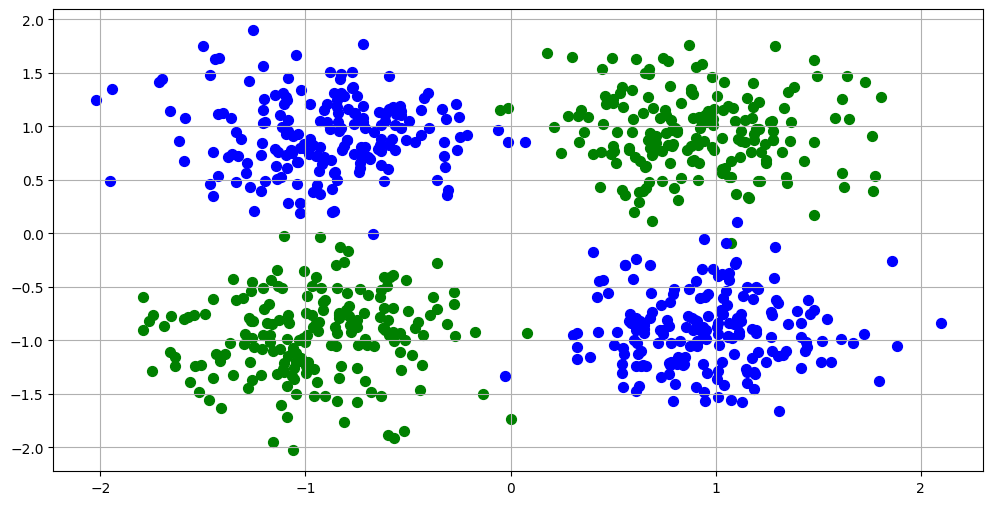

In [69]:
plt.figure(figsize=(12,6))
plt.scatter(*X[y==0].T, c='g', s=50)
plt.scatter(*X[y==1].T, c='b',s=50)
plt.grid(True)

In [107]:
#TODO: Jūsų programa prasideda nuo čia

class NN(): 
    def __init__(self, architecture:tuple):
        _input, _hidden, _output = architecture    
        
        self.w1 = np.random.normal(0, 1, (_hidden, _input))  # 2x2
        self.w2 = np.random.normal(0, 1, (_output, _hidden)) # 1x2
        self.b1 = np.random.random((_hidden, 1))             # 2x1
        self.b2 = np.random.random((_output, 1))             # 1x1
    
    def sigmoid(self, z, d=False):
        if d: return z * (1 - z)
        return 1 / (1 + np.exp(-z))

    def forward(self, x):
        z1 = np.dot(self.w1, x) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(self.w2, a1) + self.b2
        output = self.sigmoid(z2)
        return output
    
    def backward(self, x, y, output):
        m = x.shape[1]
        dz2 = output - y
        dw2 = (1 / m) * np.dot(dz2, a1.T)
        db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
        dz1 = np.dot(self.w2.T, dz2) * self.sigmoid(a1, d=True)
        dw1 = (1 / m) * np.dot(dz1, x.T)
        db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
        self.w1 -= dw1
        self.w2 -= dw2
        self.b1 -= db1
        self.b2 -= db2
    
    def fit(self, x, y, epochs):
        for epoch in range(3):
            output = self.forward(x)
            self.backward(x, y, output)
    
    def accuracy(self, x, y):
        output = self.forward(x)
        predictions = np.round(output)
        accuracy = np.sum(predictions == y) / len(y)
        return accuracy
    
    def plot(self):
        self.accuracies = []
    
        for epoch in range(3):
            output = self.forward(x)
        self.backward(x, y, output)
        
        accuracy = self.accuracy(x, y)
        self.accuracies.append(accuracy)
    
    plt.plot(range(3), self.accuracies)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

NameError: name 'self' is not defined

### Neuroninis tinklas (PyTorch)

## #3

Atlikite tą patį uždavinį (sukurti perceptrono generinę klasę kuri gali išspręsti XOR problemą) taikydami `PyTorch` biblioteką.

In [108]:
#TODO: Jūsų programa prasideda nuo čia

import torch
import matplotlib.pyplot as plt
device = torch.device("cpu")

class NN():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights      = torch.zeros(num_features, 1, dtype=torch.float32, device=device)
        self.bias         = torch.zeros(1, dtype=torch.float32, device=device)
        self.ones         = torch.ones(1)
        self.zeros        = torch.zeros(1)

    def forward(self, x):
        linear      = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors      = y - predictions
        return errors
        
    def fit(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias    += errors
                
    def accuracy(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy    = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy
    
    
    def plot_accuracy(self, x, y, epochs):
        training_accuracy = []
        validation_accuracy = []

        for e in range(epochs):
            self.fit(x, y)

            training_accuracy.append(self.accuracy(x, y))
            validation_accuracy.append(self.accuracy(x_val, y_val))

        plt.figure()

        plt.plot(training_accuracy, label="Training accuracy")
        plt.plot(validation_accuracy, label="Validation accuracy")

        plt.legend()
        plt.show()

In [110]:

epochs = 10

model = NN(num_features)

model.plot_accuracy(x, y, epochs)

NameError: name 'x' is not defined

## #4

Pritaikykite savo neurininio tinklo modelį spręsti `mnist` klasifiakcijos problemą. Duomenys rasite 
`data_samples/mnist` kataloge

In [ ]:
#TODO: Jūsų programa prasideda nuo čia

<code>**Šių uždavinų užbaigimo terminas iki 12/05 (imtinai). Sekmės!**</code>